In [98]:
#load  library
import pandas as pd
import numpy as np
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")


In [99]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

6


In [52]:
font_list[:10] 

['/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf']

In [132]:
data_url = 'data/210625_평변data_r1.xlsx'

x_data = pd.read_excel(data_url, sheet_name='정리', index_col='변경순위')
x_data = x_data.drop(['순위'], axis=1)
x_data['권리가액_억'] = x_data['권리가액'] / 100000000
condition = pd.read_excel(data_url, sheet_name='평변정보')

print('xdata : ', x_data.head(5), 'cond : ',condition.head, sep='\n')


xdata : 
      조합원        권리가액    용도   분양 면적    조합원 분양가 확정평형     확정평형2     권리가액_억
변경순위                                                                    
1     정00  1460102565  공동주택  113.29  477631364  84A  51 (1+1)  14.601026
2     김00  1161533290  공동주택  113.29  477631364  84A  51 (1+1)  11.615333
3     나00  1037500130  공동주택  113.29  477631364  84A         x  10.375001
4     경00  1034950000  공동주택  113.29  477631364  84A  51 (1+1)  10.349500
5     한00  1020206040  공동주택  113.29  477631364  84A  51 (1+1)  10.202060
cond : 
<bound method NDFrame.head of     평형     기존커트라인      현재평균가격  누적세대수  기존세대수  평형변경배정세대수  변경누적세대수   증감
0  51a          0   700000000   2458    809        195     2090 -614
1  59B  112700000   827000000   2112    382        386     1895    4
2  59A  130950000   857000000   1681    321        772     1509  451
3  71B  149250000   958000000    822    100        119      737   19
4  71A  156000000   988000000    718    218        218      618    0
5  84B  171000000  110600000

In [101]:

p_list2 = x_data.drop_duplicates(['확정평형2'])['확정평형2']
p_list2


변경순위
1       51 (1+1)
3              x
12     39B (1+1)
14     59A (1+1)
65     34B (1+1)
102    39A (1+1)
113    34A (1+1)
Name: 확정평형2, dtype: object

In [23]:
p_list = x_data.drop_duplicates(['확정평형'])['확정평형']
p_list

0       84A
6       59A
7        XX
10      84B
19      71A
24       99
97      71B
98      59B
101      51
172     34B
999     39A
1379    39B
Name: 확정평형, dtype: object

In [102]:
x_data.head(5)

,조합원,권리가액,용도,분양 면적,조합원 분양가,확정평형,확정평형2,권리가액_억
변경순위,,,,,,,,
1,정00,1460102565,공동주택,113.29,477631364,84A,51 (1+1),14.601026
2,김00,1161533290,공동주택,113.29,477631364,84A,51 (1+1),11.615333
3,나00,1037500130,공동주택,113.29,477631364,84A,x,10.375001
4,경00,1034950000,공동주택,113.29,477631364,84A,51 (1+1),10.349500
5,한00,1020206040,공동주택,113.29,477631364,84A,51 (1+1),10.202060


findfont: Font family ['New Gulim'] not found. Falling back to DejaVu Sans.


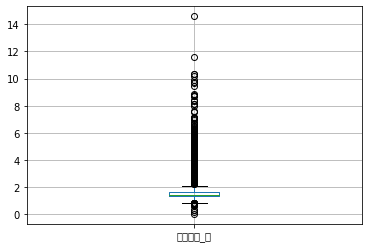

In [43]:
#plt.figure(figsize =(7,6))
boxplot = x_data.boxplot(column=['권리가액_억'])
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

<Figure size 504x432 with 0 Axes>

findfont: Font family ['New Gulim'] not found. Falling back to DejaVu Sans.


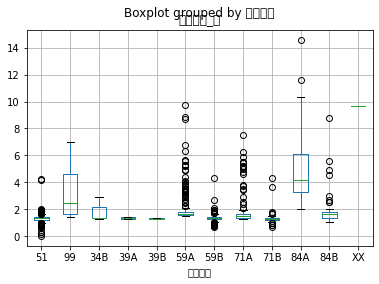

In [44]:
#
plt.figure(figsize =(7,6))
boxplot = x_data.boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

In [56]:
x_data.describe()

,권리가액,조합원 분양가,권리가액_억
count,2.011000e+03,2.011000e+03,2011.000000
mean,1.749503e+08,3.787279e+08,1.749503
std,1.207583e+08,5.855087e+07,1.207583
min,1.562000e+06,2.188417e+08,0.015620
25%,1.309500e+08,3.275164e+08,1.309500
50%,1.412500e+08,3.701371e+08,1.412500
75%,1.626250e+08,4.233930e+08,1.626250
max,1.460103e+09,1.397451e+09,14.601026


<Figure size 504x432 with 0 Axes>

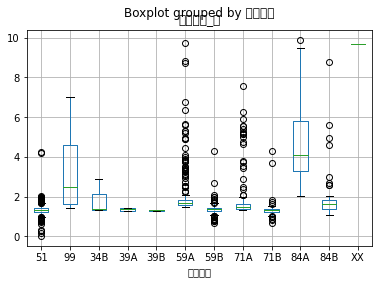

In [66]:
plt.figure(figsize =(7,6))
boxplot = x_data[ x_data['권리가액_억']  < 10.0 ].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

<Figure size 504x432 with 0 Axes>

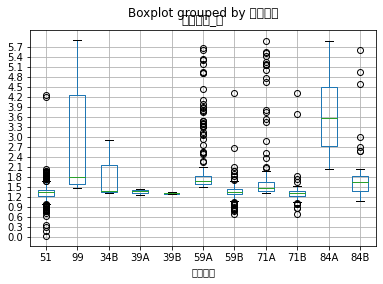

In [122]:
# < 6억 
plt.figure(figsize =(7,6))
boxplot = x_data[ x_data['권리가액_억']  < 6.0 ].boxplot(column=['권리가액_억'], by='확정평형' )
plt.yticks(np.arange(0, 6, step = 0.3))
plt.show()

<Figure size 36000x72000 with 0 Axes>

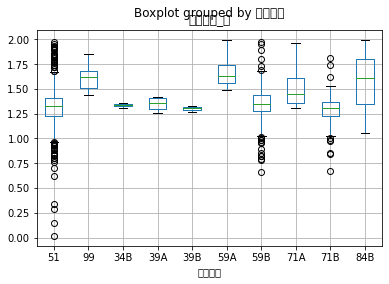

In [65]:
# < 2억 
plt.figure(figsize =(500,1000))
boxplot = x_data[ x_data['권리가액_억']  < 2.0 ].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

<Figure size 504x432 with 0 Axes>

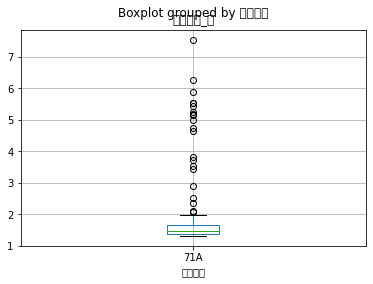

In [69]:
# 확정평형이 71A 

plt.figure(figsize =(7,6))
boxplot = x_data[ x_data['확정평형']  == '71A' ].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

<Figure size 504x432 with 0 Axes>

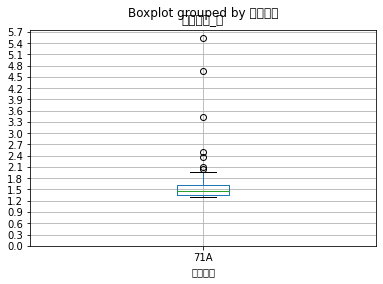

In [119]:
# 확정평형이 71A & 1채인사람

plt.figure(figsize =(7,6))
boxplot = x_data[ (x_data['확정평형']  == '71A') & (x_data['확정평형2']  == 'x')  ].boxplot(column=['권리가액_억'], by='확정평형' )
plt.yticks(np.arange(0, 6, step = 0.3))
plt.show()

In [120]:
# 확정평형이 71B

plt.figure(figsize =(7,6))
boxplot = x_data[(x_data['확정평형']  == '71B') and (x_data['권리가액_억'] < 2.0)].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 504x432 with 0 Axes>

In [95]:
x_data.head(5)

,조합원,권리가액,용도,분양 면적,조합원 분양가,확정평형,확정평형2,권리가액_억
변경순위,,,,,,,,
1,정00,1460102565,공동주택,113.29,477631364,84A,51 (1+1),14.601026
2,김00,1161533290,공동주택,113.29,477631364,84A,51 (1+1),11.615333
3,나00,1037500130,공동주택,113.29,477631364,84A,x,10.375001
4,경00,1034950000,공동주택,113.29,477631364,84A,51 (1+1),10.349500
5,한00,1020206040,공동주택,113.29,477631364,84A,51 (1+1),10.202060


<Figure size 504x432 with 0 Axes>

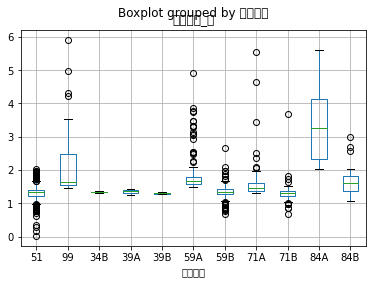

In [112]:
# < 6억 + 1채인 사람
plt.figure(figsize =(7,6))
boxplot = x_data[(x_data['확정평형2']  == 'x' ) & ( x_data['권리가액_억'] < 6.0)].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

<Figure size 504x432 with 0 Axes>

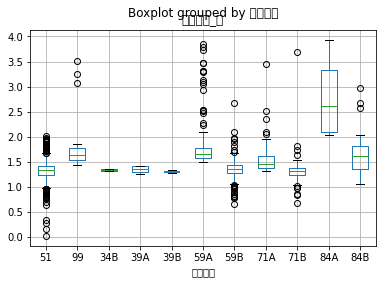

In [111]:
# < 4억 + 1채인사람
plt.figure(figsize =(7,6))
boxplot = x_data[( x_data['확정평형2']  == 'x' ) & ( x_data['권리가액_억'] < 4.0)].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

<Figure size 504x432 with 0 Axes>

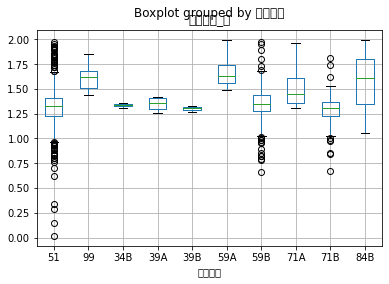

In [121]:
# < 2억 + 1채인사람
plt.figure(figsize =(7,6))
boxplot = x_data[( x_data['확정평형2']  == 'x' ) & ( x_data['권리가액_억'] < 2.0)].boxplot(column=['권리가액_억'], by='확정평형' )
#plt.yticks(np.arange(0, 2, step = 0.1))
plt.show()

In [159]:
# 각 평형별 신규커트라인 기준 아래에 있는 사람 + 2채 인사람들은 가만이 있다고 가정하고, 나머지 빈자리를 채워볼 것.
# print(condition['평형'][0])
# print(condition[condition['평형'] == '84B']['평형'])


# x_data_move1 = x_data[(x_data['확정평형'] =='84B') and (x_data['확정평형2'] == 'x') and (x_data['권리가액'] > condition['기존커트라인']['84B']) ]

#print(x_data_move1)

x_data_move = []
x_data_move_all = pd.DataFrame()
for i in range(len(condition)):
    if condition['평형'][i] == '99a' or condition['평형'][i] == '84A':
        continue    
    #print(condition['평형'][i], condition['기존커트라인'][i], sep='\n')
    x_data_move.append(x_data[(x_data['확정평형'] == condition['평형'][i]) & (x_data['확정평형2'] == 'x') & (x_data['권리가액'] > condition['기존커트라인'][i]) ])
    #print(x_data_move[i])

    #print(condition['평형'][i], '평형 빠져나가는 세대수 : ', len(x_data_move[i]) )
    print(x_data_move[i])



Empty DataFrame
Columns: [조합원, 권리가액, 용도, 분양 면적, 조합원 분양가, 확정평형, 확정평형2, 권리가액_억]
Index: []
       조합원       권리가액    용도  분양 면적    조합원 분양가 확정평형 확정평형2  권리가액_억
변경순위                                                            
200    윤00  210050000  공동주택  81.84  370137076  59B     x  2.1005
227    김00  197350000  공동주택  81.84  370137076  59B     x  1.9735
235    김00  195550000  공동주택  81.84  370137076  59B     x  1.9555
269    유00  189050000  공동주택  81.84  370137076  59B     x  1.8905
314    장00  180500000  공동주택  81.84  370137076  59B     x  1.8050
...    ...        ...   ...    ...        ...  ...   ...     ...
1881   배00  113900000  공동주택  81.84  370137076  59B     x  1.1390
1885   이00  113400000  공동주택  81.84  370137076  59B     x  1.1340
1887  홍boo  113150000  공동주택  81.84  370137076  59B     x  1.1315
1892   유00  112850000  공동주택  81.84  370137076  59B     x  1.1285
179    주00  267250000  공동주택  81.84  370137076  59B     x  2.6725

[356 rows x 8 columns]
      조합원       권리가액    용도  분양 면적    조합원 분양